In [87]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("spam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
df.Category.isna().sum()

0

In [7]:
df.Message.isna().sum()

0

In [8]:
spams=df[df['Category']=='spam']

In [9]:
spams

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [10]:
spams.shape

(747, 2)

In [11]:
spams=spams.sample(100)

In [12]:
spams.shape

(100, 2)

In [13]:
hams=df[df['Category']=='ham']

In [14]:
hams.shape

(4825, 2)

In [15]:
hams=hams.sample(spams.shape[0])

In [16]:
hams.shape

(100, 2)

In [17]:
balanced_df=pd.concat([spams,hams])

In [18]:
balanced_df.Category.value_counts()

Category
spam    100
ham     100
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

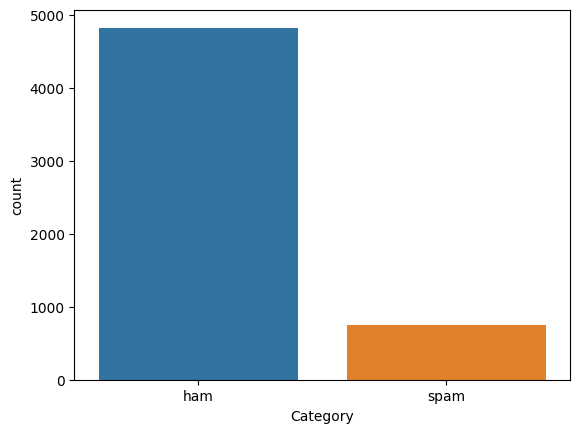

In [19]:
sns.countplot(x=df['Category'])

<Axes: xlabel='Category', ylabel='count'>

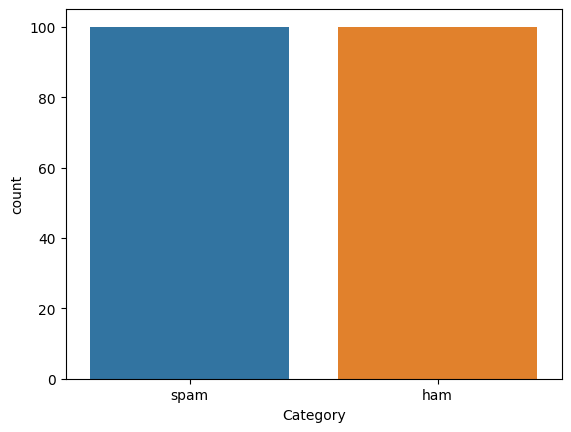

In [20]:
sns.countplot(x=balanced_df['Category'])

In [21]:
balanced_df['spam']=balanced_df.Category.apply(lambda x:1 if x=='spam' else 0)

In [22]:
balanced_df.sample(10)

,Category,Message,spam
4938,ham,G wants to know where the fuck you are,0
4866,ham,I'm really sorry I lit your hair on fire,0
1142,spam,I don't know u and u don't know me. Send CHAT ...,1
3585,spam,Hi 07734396839 IBH Customer Loyalty Offer: The...,1
3154,ham,I tagged MY friends that you seemed to count a...,0
1108,ham,From someone not to smoke when every time I've...,0
107,ham,"Aight, I'll hit you up when I get some cash",0
310,ham,Where are the garage keys? They aren't on the ...,0
505,spam,#ERROR!,1
1674,spam,Monthly password for wap. mobsi.com is 391784....,1


In [23]:
encoder_url="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"
preprocess_url="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

In [24]:
bert_prepross_model=hub.KerasLayer(preprocess_url)
bert_encoder_model=hub.KerasLayer(encoder_url)

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2023-06-30 10:18:50.612470: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [47]:
corpus=["Hello Mohamed, how are you","win 300$ by calling this number"]
preprocessed_emails=bert_prepross_model(emails)
encoded_emails=bert_encoder_model(preprocessed_emails)

In [48]:
preprocessed_emails.keys()

dict_keys(['input_type_ids', 'input_mask', 'input_word_ids'])

In [49]:
preprocessed_emails['input_word_ids']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  7592, 14467,  1010,  2129,  2024,  2017,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [50]:
preprocessed_emails['input_mask']

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [51]:
encoded_emails.keys()

dict_keys(['pooled_output', 'sequence_output', 'encoder_outputs', 'default'])

In [52]:
len(encoded_emails['encoder_outputs'])

12

In [53]:
encoded_emails['pooled_output']

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.90182185, -0.5748827 , -0.9752484 , ..., -0.9473581 ,
        -0.75805026,  0.9121673 ],
       [-0.82535243, -0.45067352, -0.31890285, ..., -0.15214133,
        -0.6827613 ,  0.85599077]], dtype=float32)>

In [54]:
encoded_emails['encoder_outputs'][-1]==encoded_emails['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])>

In [38]:
encoded_emails['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[-0.03514772, -0.1319784 ,  0.14726344, ..., -0.19218673,
          0.34064415,  0.63847065],
        [ 0.21122062,  0.06696482,  0.4008923 , ..., -0.21089952,
          0.94867015,  0.00320228],
        [ 0.711871  , -0.22913232, -0.02138554, ..., -0.28345302,
          0.13508263, -0.2906294 ],
        ...,
        [-0.21393436,  0.15879564,  0.7211592 , ...,  0.05380814,
          0.0510683 , -0.0715643 ],
        [ 0.04716092, -0.06260935,  0.68938553, ...,  0.06296109,
          0.13212484, -0.12008545],
        [-0.1989959 ,  0.09340785,  0.7104369 , ...,  0.09575574,
          0.03469355, -0.13842086]],

       [[-0.29152364,  0.23840849,  0.02896825, ..., -0.40450716,
          0.00437994,  0.7639582 ],
        [ 0.09805386,  0.35679987,  0.31540883, ..., -0.29645297,
          0.357851  ,  0.9869275 ],
        [ 0.5439975 , -0.12458397,  0.43267852, ..., -0.76643413,
         -0.15341686,  0.21542758],
        ...,

In [75]:
simple_text=["Tim","Bill","Bananas","Mango"]
encoded_simple_text=bert_encoder_model(bert_prepross_model(simple_text))['pooled_output']

In [63]:
encoded_simple_text[1]

<tf.Tensor: shape=(768,), dtype=float32, numpy=
array([-0.84417486, -0.36974958, -0.03477198,  0.7021635 , -0.27998284,
       -0.20972158,  0.8758056 ,  0.30156925, -0.05036598, -0.9999318 ,
        0.11804488,  0.44203478,  0.97411615,  0.12546895,  0.88397145,
       -0.61814374, -0.1323358 , -0.5519742 ,  0.52029896, -0.7129428 ,
        0.5851807 ,  0.98827946,  0.3647321 ,  0.30239585,  0.44862083,
        0.6226656 , -0.6277767 ,  0.87157255,  0.9327473 ,  0.7214598 ,
       -0.6894877 ,  0.24255674, -0.9774239 , -0.3141651 , -0.11533179,
       -0.98531103,  0.32528925, -0.7033812 , -0.12899059, -0.12066813,
       -0.7829444 ,  0.36825612,  0.999046  ,  0.0088521 , -0.12355988,
       -0.39510477, -0.99997145,  0.34166747, -0.8361411 ,  0.1454971 ,
       -0.03883848, -0.08625295,  0.19707331,  0.45343015,  0.44161892,
        0.18655218,  0.0027211 ,  0.24296859, -0.21087407, -0.57541394,
       -0.53812784,  0.3260758 , -0.25619483, -0.87584543, -0.0433472 ,
       -0.213235

In [79]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([encoded_simple_text[0]],[encoded_simple_text[3]])

array([[0.9806396]], dtype=float32)

In [67]:
v1=[[5,7,8,-5]]
v2=[[5,8,9,-5]]
cosine_similarity(v1,v2)

array([[0.99840994]])

In [25]:
input_layer=tf.keras.Input(shape=(),dtype=tf.dtypes.string,name='input_layer')
preprocess_text_layer=bert_prepross_model(input_layer)
encoder_layer=bert_encoder_model(preprocess_text_layer)
dropout_layer=tf.keras.layers.Dropout(0.1,name='dropout_layer')(encoder_layer['pooled_output'])
output_layer=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(dropout_layer)
model=tf.keras.Model(inputs=[input_layer], outputs=[output_layer])



In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_type_ids':   0           ['input_layer[0][0]']            
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [27]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(),
    tf.keras.metrics.Precision(),
    tf.keras.metrics.Recall()
]
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=METRICS)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    balanced_df['Message'], 
    balanced_df['spam'], 
    stratify=balanced_df['spam'],
    test_size=0.2
    )

In [29]:
X_train.head()

1673    URGENT! We are trying to contact U. Todays dra...
1801    excellent. I spent  &lt;#&gt;  years in the Ai...
4394    RECPT 1/3. You have ordered a Ringtone. Your o...
3421    As a valued customer, I am pleased to advise y...
1108    From someone not to smoke when every time I've...
Name: Message, dtype: object

In [30]:
Y_train.head()

1673    1
1801    0
4394    1
3421    1
1108    0
Name: spam, dtype: int64

In [31]:
history=model.fit(X_train, Y_train, epochs=50, validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 16s 3s/step - loss: 0.6918 - binary_accuracy: 0.5391 - precision: 0.5417 - recall: 0.4127 - val_loss: 0.6600 - val_binary_accuracy: 0.6250 - val_precision: 0.6000 - val_recall: 0.8824
Epoch 2/50
4/4 [==============================] - 11s 3s/step - loss: 0.6887 - binary_accuracy: 0.5703 - precision: 0.5513 - recall: 0.6825 - val_loss: 0.6428 - val_binary_accuracy: 0.7188 - val_precision: 0.6538 - val_recall: 1.0000
Epoch 3/50
4/4 [==============================] - 11s 3s/step - loss: 0.6621 - binary_accuracy: 0.6016 - precision: 0.5938 - recall: 0.6032 - val_loss: 0.6319 - val_binary_accuracy: 0.6562 - val_precision: 0.7143 - val_recall: 0.5882
Epoch 4/50
4/4 [==============================] - 11s 3s/step - loss: 0.6447 - binary_accuracy: 0.5938 - precision: 0.6486 - recall: 0.3810 - val_loss: 0.6184 - val_binary_accuracy: 0.6562 - val_precision: 0.7143 - val_recall: 0.5882
Epoch 5/50
4/4 [==============================] - 11s 3s/step - 

In [80]:
model.evaluate(X_test,Y_test)

2/2 [==============================] - 7s 2s/step - loss: 0.2421 - binary_accuracy: 0.9750 - precision: 1.0000 - recall: 0.9500


[0.24212132394313812, 0.9750000238418579, 1.0, 0.949999988079071]

In [81]:
y_predicted=model.predict(X_test)

2/2 [==============================] - 6s 2s/step


In [86]:
y_predicted

array([[0.06070319],
       [0.88201153],
       [0.4813815 ],
       [0.73973465],
       [0.15911812],
       [0.10555382],
       [0.7164911 ],
       [0.2584961 ],
       [0.8795364 ],
       [0.1373716 ],
       [0.87698793],
       [0.7489918 ],
       [0.56748694],
       [0.31059262],
       [0.21816202],
       [0.10587174],
       [0.07590651],
       [0.25941947],
       [0.84597766],
       [0.87202704],
       [0.02763875],
       [0.87866974],
       [0.9417441 ],
       [0.82118833],
       [0.43117216],
       [0.31131133],
       [0.88449323],
       [0.8308649 ],
       [0.48009852],
       [0.05785055],
       [0.9509256 ],
       [0.92076933],
       [0.36258593],
       [0.21415138],
       [0.03864854],
       [0.785019  ],
       [0.38568065],
       [0.81505984],
       [0.7326509 ],
       [0.32205936]], dtype=float32)

In [89]:
y_predicted=np.where(y_predicted>0.5,1,0)

In [90]:
y_predicted

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(Y_test, y_predicted)
print(cm)

[[20  0]
 [ 1 19]]


Text(50.722222222222214, 0.5, 'Truth')

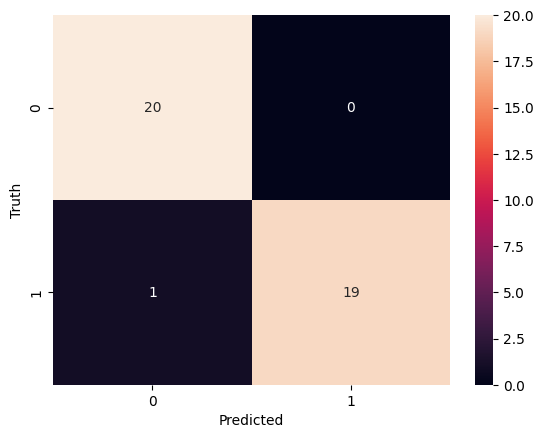

In [98]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [101]:
history_df=pd.DataFrame(history.history)

In [102]:
history_df.head()

,loss,binary_accuracy,precision,recall,val_loss,val_binary_accuracy,val_precision,val_recall
0,0.691782,0.539062,0.541667,0.412698,0.660042,0.62500,0.600000,0.882353
1,0.688719,0.570312,0.551282,0.682540,0.642752,0.71875,0.653846,1.000000
2,0.662058,0.601562,0.593750,0.603175,0.631879,0.65625,0.714286,0.588235
3,0.644684,0.593750,0.648649,0.380952,0.618356,0.65625,0.714286,0.588235
4,0.642329,0.632812,0.617647,0.666667,0.605712,0.71875,0.653846,1.000000


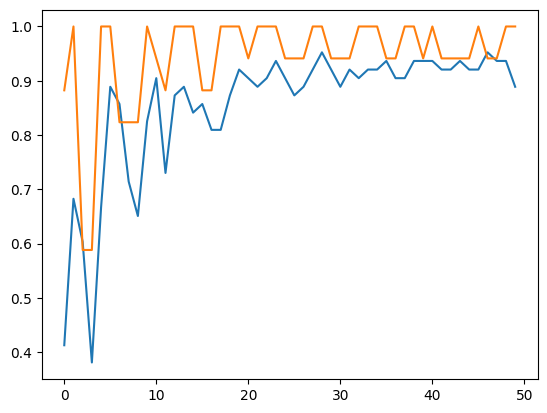

In [108]:
plt.plot(history_df['recall'])
plt.plot(history_df['val_recall'])

In [110]:
print(classification_report(Y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.95      0.97        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



In [145]:
reviews=['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']
result=model.predict(reviews)
result

1/1 [==============================] - 0s 418ms/step


array([[0.37979808]], dtype=float32)

In [124]:
spams.head()

,Category,Message
1048,spam,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...
65,spam,"As a valued customer, I am pleased to advise y..."
1734,spam,"Hi, this is Mandy Sullivan calling from HOTMIX..."
709,spam,To review and KEEP the fantastic Nokia N-Gage ...
5205,spam,Had your mobile 11mths ? Update for FREE to Or...


In [125]:
spams.Message

1048    1000's flirting NOW! Txt GIRL or BLOKE & ur NA...
65      As a valued customer, I am pleased to advise y...
1734    Hi, this is Mandy Sullivan calling from HOTMIX...
709     To review and KEEP the fantastic Nokia N-Gage ...
5205    Had your mobile 11mths ? Update for FREE to Or...
                              ...                        
4394    RECPT 1/3. You have ordered a Ringtone. Your o...
2575    Your next amazing xxx PICSFREE1 video will be ...
3132    LookAtMe!: Thanks for your purchase of a video...
95      Your free ringtone is waiting to be collected....
1888    Urgent! Please call 09061743811 from landline....
Name: Message, Length: 100, dtype: object

In [130]:
spams.Message

<bound method Series.take of 1048    1000's flirting NOW! Txt GIRL or BLOKE & ur NA...
65      As a valued customer, I am pleased to advise y...
1734    Hi, this is Mandy Sullivan calling from HOTMIX...
709     To review and KEEP the fantastic Nokia N-Gage ...
5205    Had your mobile 11mths ? Update for FREE to Or...
                              ...                        
4394    RECPT 1/3. You have ordered a Ringtone. Your o...
2575    Your next amazing xxx PICSFREE1 video will be ...
3132    LookAtMe!: Thanks for your purchase of a video...
95      Your free ringtone is waiting to be collected....
1888    Urgent! Please call 09061743811 from landline....
Name: Message, Length: 100, dtype: object>